# Principal Components Analysis Nutrition Exercise
En este ejercicio no vas a montar ningún modelo de Machine Learning supervisado, sino aprenderás a trabajar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlos, graficar y escoger número de componentes según varianza.

Importa las librerías necesarias

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

### Importa los datos
1. Importa los datos: *nndb.csv*
2. Observa las columnas que hay, así como su tipo.

In [31]:
df=pd.read_csv('./data/nndb_flat.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [32]:
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [33]:
df.describe()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
count,8618.000000,8618.000000,8618.00000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,...,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,15467.757368,226.438617,11.52391,10.647024,21.819062,6.560253,2.023242,93.968786,0.264369,1.225260,...,0.125765,0.213222,0.182499,0.174881,0.061176,0.000191,0.077965,0.222838,0.229363,0.179111
std,9221.428766,169.388910,10.55059,15.866353,27.239000,13.602098,4.313670,779.362205,0.478614,4.319183,...,0.466402,0.302161,0.346062,0.431974,0.167803,0.000615,0.133496,0.290133,0.514406,0.305292
min,1001.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8695.250000,93.000000,2.47000,0.992500,0.040000,0.000000,0.000000,0.000000,0.034250,0.000000,...,0.000000,0.023875,0.035385,0.025000,0.007500,0.000033,0.023810,0.052857,0.001818,0.020909
50%,14273.000000,191.000000,8.28500,5.235000,8.945000,0.370000,0.300000,1.500000,0.120000,0.080000,...,0.017500,0.131250,0.115385,0.064583,0.015833,0.000088,0.047619,0.190000,0.070909,0.076818
75%,20050.750000,336.000000,19.97750,13.900000,32.900000,5.300000,2.400000,21.000000,0.355000,1.297500,...,0.062500,0.314328,0.200000,0.185833,0.051667,0.000161,0.069048,0.308571,0.387273,0.245455
max,93600.000000,902.000000,88.32000,100.000000,100.000000,99.800000,79.000000,30000.000000,12.000000,98.890000,...,14.702500,7.968750,13.461538,19.479167,6.136667,0.016722,1.859524,14.168571,34.854545,8.268182


In [34]:
col_nulos=[col for col in df.columns if df[col].isnull().any()]
col_nulos

#Columnas con al menos un valor nulo

['CommonName', 'MfgName', 'ScientificName']

In [35]:
col_object=[col for col in df.columns if df[col].dtype=='object']
col_object #columnas de tipo string

['FoodGroup',
 'ShortDescrip',
 'Descrip',
 'CommonName',
 'MfgName',
 'ScientificName']

### Mira a ver la correlación entre las variables numéricas
¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

In [36]:
df.columns

Index(['ID', 'FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName',
       'ScientificName', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g',
       'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg',
       'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg',
       'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA',
       'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA',
       'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA',
       'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'],
      dtype='object')

In [37]:
col_USRDA=[col for col in df.columns if col.endswith('USRDA')]
df_USRDA=df[col_USRDA]
df_USRDA

,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [38]:
df_USRDA.describe()

,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
count,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,0.104410,0.155511,0.510525,0.088060,0.058155,0.125765,0.213222,0.182499,0.174881,0.061176,0.000191,0.077965,0.222838,0.229363,0.179111
std,0.865958,0.281538,1.799659,0.639808,0.256602,0.466402,0.302161,0.346062,0.431974,0.167803,0.000615,0.133496,0.290133,0.514406,0.305292
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.020147,0.000000,0.000000,0.000000,0.000000,0.023875,0.035385,0.025000,0.007500,0.000033,0.023810,0.052857,0.001818,0.020909
50%,0.001667,0.070588,0.033333,0.000000,0.007333,0.017500,0.131250,0.115385,0.064583,0.015833,0.000088,0.047619,0.190000,0.070909,0.076818
75%,0.023333,0.208824,0.540625,0.027778,0.030000,0.062500,0.314328,0.200000,0.185833,0.051667,0.000161,0.069048,0.308571,0.387273,0.245455
max,33.333333,7.058824,41.204167,26.666667,9.960000,14.702500,7.968750,13.461538,19.479167,6.136667,0.016722,1.859524,14.168571,34.854545,8.268182


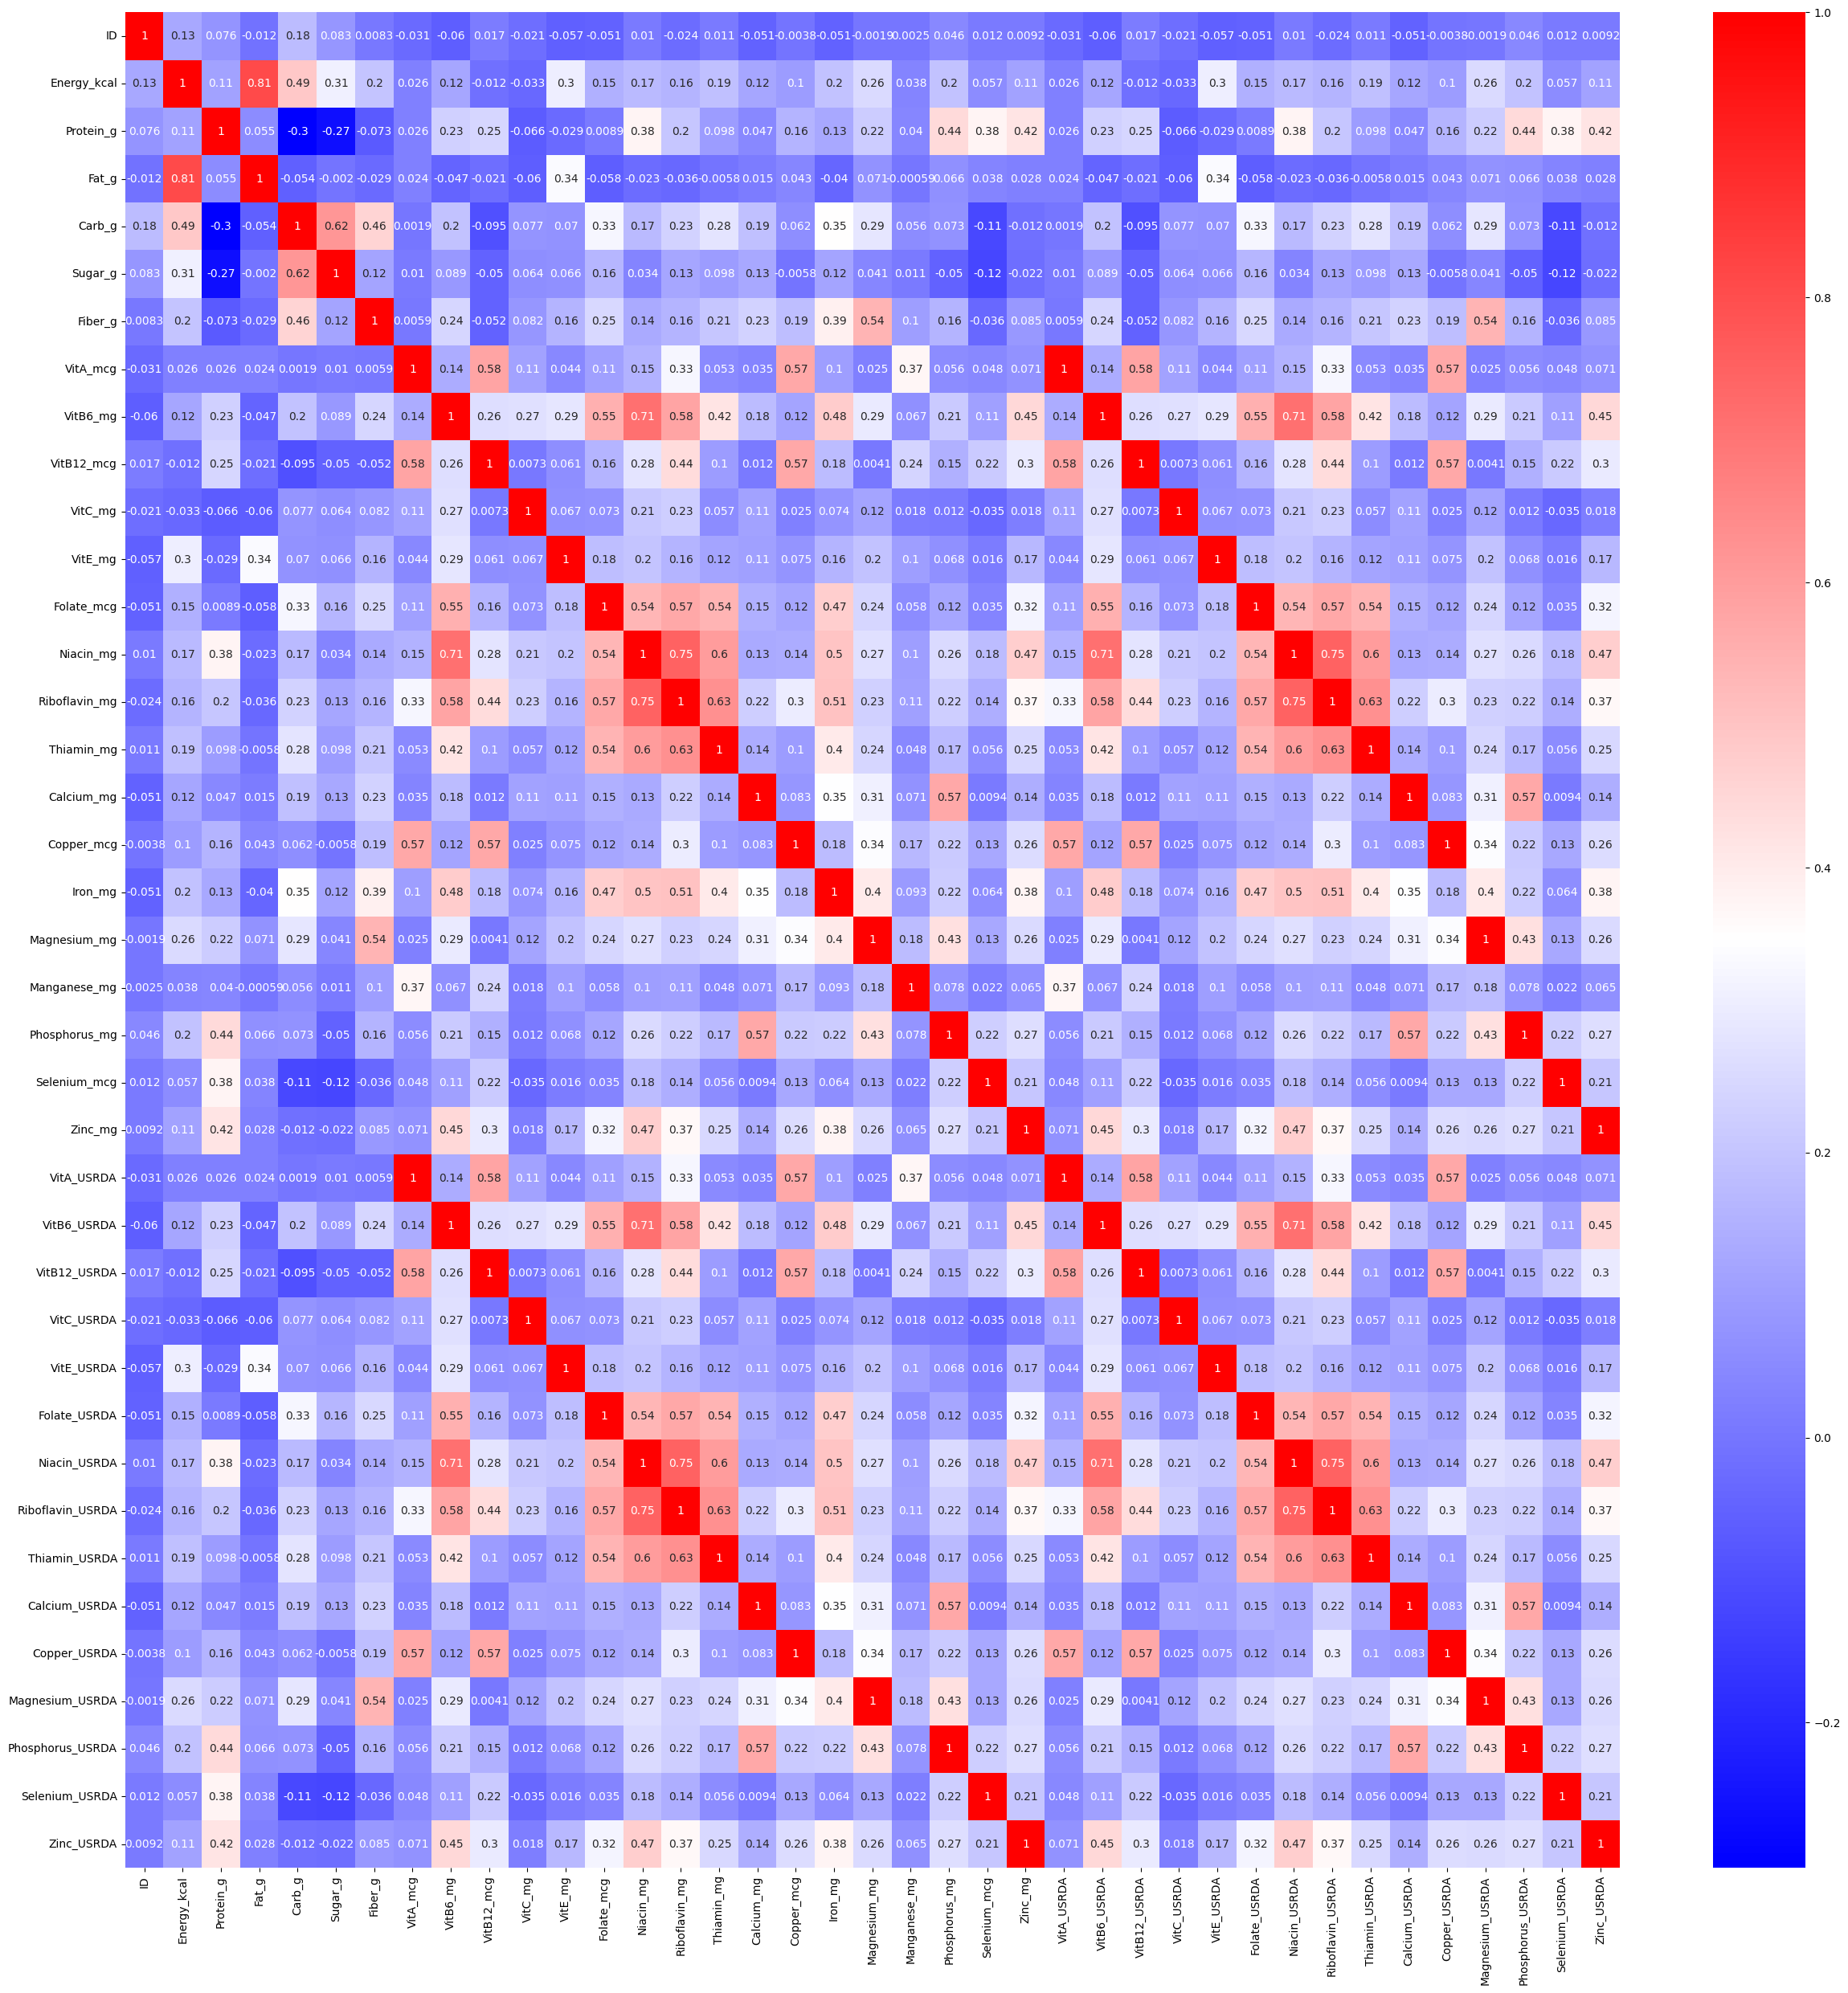

In [39]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap="bwr"); #vemos que las variables _usrd y_mg SON IGUALES por lo tanto eliminamos unas

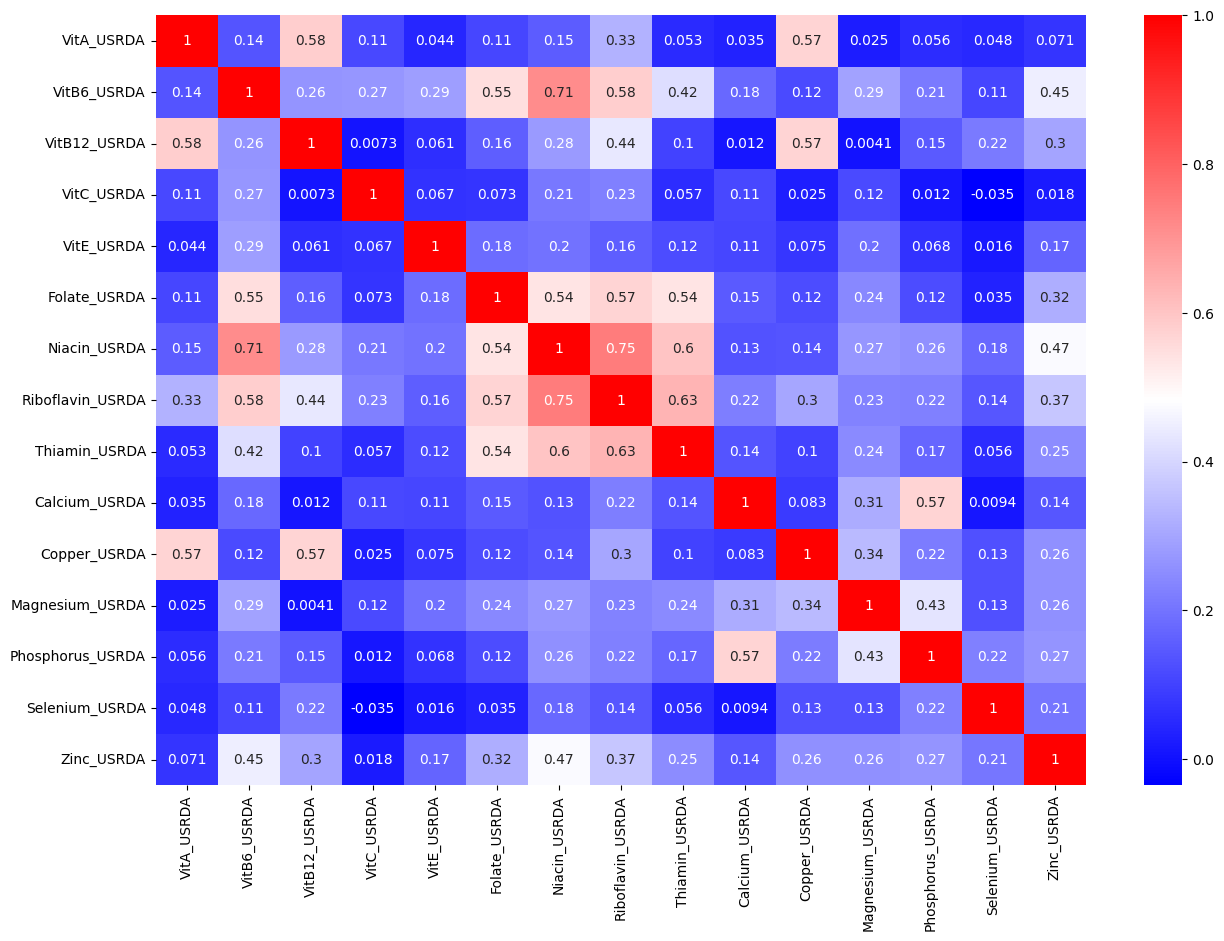

In [40]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_USRDA.corr(numeric_only=True),annot=True, cmap="bwr");

In [41]:
for columna in df_USRDA.columns: #Vemos que casi todas las columnas estan llenas de ceros. Las eliminaremos ya que no nos aportan nada de informacion
    print(f"Valores de la columna {columna}:")
    print(df[columna].value_counts())
    print('-'*100)

Valores de la columna VitA_USRDA:
VitA_USRDA
0.000000    3985
0.002222     461
0.001111     324
0.003333     225
0.004444     171
            ... 
0.857778       1
1.490000       1
1.555556       1
1.190000       1
0.895556       1
Name: count, Length: 562, dtype: int64
----------------------------------------------------------------------------------------------------
Valores de la columna VitB6_USRDA:
VitB6_USRDA
0.000000    1279
0.011765     133
0.058824     101
0.023529      98
0.017647      96
            ... 
0.575294       1
3.358824       1
0.480588       1
0.479412       1
0.500588       1
Name: count, Length: 991, dtype: int64
----------------------------------------------------------------------------------------------------
Valores de la columna VitB12_USRDA:
VitB12_USRDA
0.000000    4031
0.004167      64
0.041667      64
0.008333      54
0.125000      53
            ... 
3.779167       1
7.558333       1
8.370833       1
1.929167       1
4.029167       1
Name: count, Lengt

In [42]:
df=df.drop(col_USRDA, axis=1)

In [43]:
df.shape

(8618, 30)

### Variables no numéricas
Elimina las variables de texto del dataset

In [44]:
col_object=[col for col in df.columns if df[col].dtype=='object']
col_object #columnas de tipo string

['FoodGroup',
 'ShortDescrip',
 'Descrip',
 'CommonName',
 'MfgName',
 'ScientificName']

In [45]:
col_object

['FoodGroup',
 'ShortDescrip',
 'Descrip',
 'CommonName',
 'MfgName',
 'ScientificName']

In [46]:
df=df.drop(col_object, axis=1)

In [47]:
[col for col in df.columns if df[col].dtype=='object'] #Para comprobar que los hayamos borrado

[]

### Distribuciones
Muchas de las variables tienen asimetría hacia la derecha. Deberíamos transformarlas para conseguir distribuciones normales y mejorar las correlaciones de cara al PCA y a futuros modelos lineales que vayamos a probar. Transforma todas las variables realizando una transformación Logarítmica.

In [48]:
sns.pairplot(df)

Error in callback <function flush_figures at 0x00000266E98D0220> (for post_execute):


KeyboardInterrupt: 

In [49]:
df['Manganese_mg'].value_counts()

Manganese_mg
0.000      2291
0.011       205
0.010       166
0.013       162
0.012       151
           ... 
125.000       1
7.967         1
0.851         1
0.522         1
0.887         1
Name: count, Length: 1230, dtype: int64

In [50]:
# Reemplazar valores menores que 0 con NaN
df = df.mask(df < 0)

# Eliminar filas que contienen NaN
df = df.dropna()

In [51]:
df.head()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,1001,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,...,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,1002,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,...,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,1003,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,...,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,1004,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,...,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,1005,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,...,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60


In [52]:
df=df.drop(['Fiber_g','VitC_mg','Manganese_mg'], axis=1) #columnas con muchos 0

In [53]:
df_log = np.log(df)
df_log.head()

c:\Users\Bridgeschool37\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitE_mg,...,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,6.908755,6.575076,-0.162519,4.395806,-2.813411,-2.813411,6.527958,-5.809143,-1.771957,0.841567,...,-3.170086,-3.381395,-5.298317,3.178054,-inf,-3.912023,0.693147,3.178054,0.000000,-2.407946
1,6.909753,6.575076,-0.162519,4.395806,-2.813411,-2.813411,6.527958,-5.809143,-2.040221,0.841567,...,-3.170086,-3.381395,-5.298317,3.178054,-4.135167,-1.832581,0.693147,3.135494,0.000000,-2.995732
2,6.910751,6.775366,-1.272966,4.599957,-inf,-inf,6.733402,-6.907755,-4.605170,1.029619,...,-5.809143,-5.298317,-6.907755,1.386294,-6.907755,-inf,-inf,1.098612,-inf,-4.605170
3,6.911747,5.866468,3.063391,3.358290,0.850151,-0.693147,5.288267,-1.795767,0.198851,-1.386294,...,0.015873,-0.962335,-3.540459,6.269096,-3.218876,-1.171183,3.135494,5.958425,2.674149,0.978326
4,6.912743,5.916202,3.145875,3.390473,1.026042,-0.673345,5.676754,-2.733368,0.231112,-1.347074,...,-2.137071,-1.046969,-4.268698,6.513230,-3.729701,-0.843970,3.178054,6.111467,2.674149,0.955511


In [54]:
[col for col in df_log.columns if df_log[col].dtype=='object']

[]

In [55]:
# Reemplazar -inf con NaN
df_log.replace([np.inf, -np.inf], np.nan, inplace=True)

# Eliminar filas que contienen NaN
df_log = df_log.dropna()

df_log.head()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitE_mg,...,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
1,6.909753,6.575076,-0.162519,4.395806,-2.813411,-2.813411,6.527958,-5.809143,-2.040221,0.841567,...,-3.170086,-3.381395,-5.298317,3.178054,-4.135167,-1.832581,0.693147,3.135494,0.000000,-2.995732
3,6.911747,5.866468,3.063391,3.358290,0.850151,-0.693147,5.288267,-1.795767,0.198851,-1.386294,...,0.015873,-0.962335,-3.540459,6.269096,-3.218876,-1.171183,3.135494,5.958425,2.674149,0.978326
4,6.912743,5.916202,3.145875,3.390473,1.026042,-0.673345,5.676754,-2.733368,0.231112,-1.347074,...,-2.137071,-1.046969,-4.268698,6.513230,-3.729701,-0.843970,3.178054,6.111467,2.674149,0.955511
5,6.913737,5.811141,3.032546,3.320710,-0.798508,-0.798508,5.159055,-1.448170,0.500775,-1.427116,...,-0.967584,-0.653926,-2.659260,5.214936,-3.963316,-0.693147,2.995732,5.236442,2.674149,0.867100
6,6.914731,5.703782,2.985682,3.188829,-0.776529,-0.776529,5.484797,-1.482805,0.262364,-1.560648,...,-0.462035,-0.717440,-3.575551,5.961005,-3.863233,-1.108663,2.995732,5.849325,2.674149,0.867100


In [56]:
#David
for i in df.columns:
    df[i]=np.log1p(df[i]) #logaritmo neperiano
print(df)

df_log=df

             ID  Energy_kcal  Protein_g     Fat_g    Carb_g   Sugar_g  \
0      6.909753     6.576470   0.615186  4.408060  0.058269  0.058269   
1      6.910751     6.576470   0.615186  4.408060  0.058269  0.058269   
2      6.911747     6.776507   0.246860  4.609959  0.000000  0.000000   
3      6.912743     5.869297   3.109061  3.392493  1.205971  0.405465   
4      6.913737     5.918894   3.188004  3.423611  1.332366  0.412110   
...         ...          ...        ...       ...       ...       ...   
8613  11.327932     5.723585   2.970414  3.261935  0.000000  0.000000   
8614  11.410239     4.718499   3.069912  0.609766  1.857859  0.000000   
8615  11.412895     5.598422   0.000000  0.000000  4.305955  4.306764   
8616  11.413779     4.510860   2.839078  0.875469  1.098612  0.000000   
8617  11.446796     4.499810   3.034953  0.405465  0.000000  0.000000   

      VitA_mcg  VitB6_mg  VitB12_mcg   VitE_mg  ...  Niacin_mg  Riboflavin_mg  \
0     6.529419  0.002996    0.157004  1.19

### Estandarizado
Estandariza cada variable.

No es necesario que dividas en train y test.

In [57]:
estandarizado=StandardScaler()
estandarizado.fit_transform(df_log)

array([[-3.48071717,  1.54041394, -1.37969871, ..., -0.60719321,
        -0.7007746 , -1.02653251],
       [-3.47934263,  1.54041394, -1.37969871, ..., -0.63094868,
        -0.7007746 , -1.08029176],
       [-3.47796946,  1.74566103, -1.72821981, ..., -1.67362391,
        -1.18406043, -1.13613927],
       ...,
       [ 2.72451954,  0.5368946 , -1.96180649, ..., -1.20172081,
        -0.81408833, -0.90032061],
       [ 2.72573736, -0.57899174,  0.72461786, ...,  0.78396183,
         1.14915612, -0.15377561],
       [ 2.77123467, -0.59032935,  0.90996043, ...,  0.54480405,
         0.82341485, -0.15377561]])

In [58]:
df_log.head()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitE_mg,...,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,6.909753,6.576470,0.615186,4.408060,0.058269,0.058269,6.529419,0.002996,0.157004,1.199965,...,0.041142,0.033435,0.004988,3.218876,0.000000,0.019803,1.098612,3.218876,0.693147,0.086178
1,6.910751,6.576470,0.615186,4.408060,0.058269,0.058269,6.529419,0.002996,0.122218,1.199965,...,0.041142,0.033435,0.004988,3.218876,0.015873,0.148420,1.098612,3.178054,0.693147,0.048790
2,6.911747,6.776507,0.246860,4.609959,0.000000,0.000000,6.734592,0.001000,0.009950,1.335001,...,0.002996,0.004988,0.001000,1.609438,0.001000,0.000000,0.000000,1.386294,0.000000,0.009950
3,6.912743,5.869297,3.109061,3.392493,1.205971,0.405465,5.293305,0.153579,0.797507,0.223144,...,0.701115,0.323532,0.028587,6.270988,0.039221,0.270027,3.178054,5.961005,2.740840,1.297463
4,6.913737,5.918894,3.188004,3.423611,1.332366,0.412110,5.680173,0.062975,0.815365,0.231112,...,0.111541,0.300845,0.013903,6.514713,0.023717,0.357674,3.218876,6.113682,2.740840,1.280934


### Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [59]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8618 non-null   float64
 1   Energy_kcal    8618 non-null   float64
 2   Protein_g      8618 non-null   float64
 3   Fat_g          8618 non-null   float64
 4   Carb_g         8618 non-null   float64
 5   Sugar_g        8618 non-null   float64
 6   VitA_mcg       8618 non-null   float64
 7   VitB6_mg       8618 non-null   float64
 8   VitB12_mcg     8618 non-null   float64
 9   VitE_mg        8618 non-null   float64
 10  Folate_mcg     8618 non-null   float64
 11  Niacin_mg      8618 non-null   float64
 12  Riboflavin_mg  8618 non-null   float64
 13  Thiamin_mg     8618 non-null   float64
 14  Calcium_mg     8618 non-null   float64
 15  Copper_mcg     8618 non-null   float64
 16  Iron_mg        8618 non-null   float64
 17  Magnesium_mg   8618 non-null   float64
 18  Phosphor

In [60]:
df_log.head()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitE_mg,...,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,6.909753,6.576470,0.615186,4.408060,0.058269,0.058269,6.529419,0.002996,0.157004,1.199965,...,0.041142,0.033435,0.004988,3.218876,0.000000,0.019803,1.098612,3.218876,0.693147,0.086178
1,6.910751,6.576470,0.615186,4.408060,0.058269,0.058269,6.529419,0.002996,0.122218,1.199965,...,0.041142,0.033435,0.004988,3.218876,0.015873,0.148420,1.098612,3.178054,0.693147,0.048790
2,6.911747,6.776507,0.246860,4.609959,0.000000,0.000000,6.734592,0.001000,0.009950,1.335001,...,0.002996,0.004988,0.001000,1.609438,0.001000,0.000000,0.000000,1.386294,0.000000,0.009950
3,6.912743,5.869297,3.109061,3.392493,1.205971,0.405465,5.293305,0.153579,0.797507,0.223144,...,0.701115,0.323532,0.028587,6.270988,0.039221,0.270027,3.178054,5.961005,2.740840,1.297463
4,6.913737,5.918894,3.188004,3.423611,1.332366,0.412110,5.680173,0.062975,0.815365,0.231112,...,0.111541,0.300845,0.013903,6.514713,0.023717,0.357674,3.218876,6.113682,2.740840,1.280934


In [61]:
df_log=df_log.drop('ID',axis=1)
df_log.shape

(8618, 20)

In [62]:
modelo_pca=PCA()
x_pca=modelo_pca.fit_transform(df_log)

In [63]:
modelo_pca.components_

array([[ 1.32155865e-01,  2.37486671e-01,  1.21336050e-01,
         1.36311530e-02, -3.91763963e-02,  2.90892535e-01,
         4.22351614e-02,  9.86328208e-02,  3.60688523e-02,
         4.07150032e-01,  1.80958194e-01,  3.97786538e-02,
         3.20130683e-02,  2.90141305e-01,  3.01512453e-02,
         1.40348614e-01,  3.50162301e-01,  4.98608732e-01,
         3.32892428e-01,  1.55902297e-01],
       [-4.29683019e-02, -2.59655495e-01, -1.68350396e-01,
         5.31187604e-01,  3.51227563e-01,  4.26921996e-01,
        -8.51403780e-03, -1.12651290e-01,  4.20114098e-02,
         2.93852508e-01, -1.22298896e-01,  7.07505857e-03,
         1.30913895e-02,  2.60760588e-01,  7.04681304e-03,
         1.80453008e-02,  1.60085984e-02, -1.72039722e-01,
        -2.90626408e-01, -1.25947956e-01],
       [-2.11809159e-01, -4.40100043e-02, -7.15263854e-02,
        -4.49360002e-01, -2.24570341e-01,  7.80200919e-01,
        -1.58480476e-04,  8.09565437e-02,  1.13697311e-02,
        -1.02701436e-01, -5.3

In [64]:
pd.DataFrame(
    data = modelo_pca.components_,
    columns = df_log.columns,
)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,0.132156,0.237487,0.121336,0.013631,-0.039176,0.290893,0.042235,0.098633,0.036069,0.407150,0.180958,0.039779,0.032013,0.290141,0.030151,0.140349,0.350162,0.498609,0.332892,0.155902
1,-0.042968,-0.259655,-0.168350,0.531188,0.351228,0.426922,-0.008514,-0.112651,0.042011,0.293853,-0.122299,0.007075,0.013091,0.260761,0.007047,0.018045,0.016009,-0.172040,-0.290626,-0.125948
2,-0.211809,-0.044010,-0.071526,-0.449360,-0.224570,0.780201,-0.000158,0.080957,0.011370,-0.102701,-0.053257,-0.005002,-0.032951,-0.062410,-0.014534,-0.106635,-0.171591,-0.124966,0.066788,-0.028958
3,-0.401551,-0.099604,-0.517475,-0.160394,-0.294963,-0.266463,-0.001983,-0.029009,-0.078345,0.587362,-0.050915,-0.016397,-0.013710,-0.047200,0.009641,-0.040103,0.099019,-0.082684,0.038198,-0.016323
4,-0.253541,0.038648,-0.279676,-0.046942,-0.114917,-0.083484,-0.029260,-0.069669,-0.111583,-0.488219,-0.124428,-0.026357,-0.028905,0.660585,-0.007372,-0.066714,0.173988,0.254655,-0.150958,-0.036145
5,0.151254,0.030413,0.400384,-0.170160,-0.207560,-0.147298,-0.034202,-0.025944,0.098822,0.276325,-0.148831,-0.019128,-0.021083,0.591661,-0.003696,-0.036667,-0.303616,-0.403756,0.065220,-0.018877
6,0.132612,-0.083314,0.299514,0.083486,-0.585277,0.071690,-0.047320,-0.214405,0.034165,0.089029,-0.140323,-0.046773,-0.016011,-0.168881,0.017409,-0.044407,0.234071,0.217959,-0.553463,-0.110708
7,-0.054563,0.184108,-0.051905,-0.209938,0.070956,-0.007693,0.130877,0.297558,0.002151,0.047053,0.360551,0.110767,0.089800,0.082939,0.019749,0.457552,-0.047685,-0.135195,-0.586947,0.267144
8,0.135391,0.171228,-0.225445,0.507499,-0.538015,0.099786,0.032298,0.022563,-0.208538,-0.169823,0.230597,0.053221,0.067870,0.009783,0.013463,0.256478,-0.169930,-0.237597,0.241536,-0.018234
9,-0.009117,-0.169527,0.035545,-0.047107,-0.053242,0.012429,0.055411,-0.077327,0.346266,-0.178498,0.054101,-0.003951,0.000654,0.006164,0.073789,0.097578,0.696867,-0.501683,0.156545,0.155346


### Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

In [71]:
varianza_acumulada=np.cumsum(modelo_pca.explained_variance_ratio_)

In [73]:
modelo_pca.explained_variance_ratio_.cumsum;

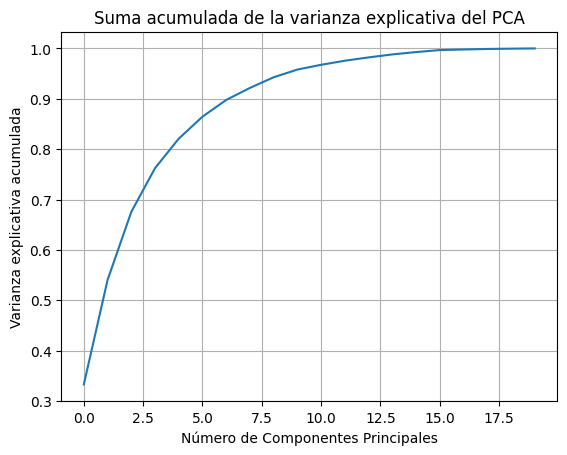

In [66]:

# Visualizar en un diagrama de líneas
plt.plot(varianza_acumulada)
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza explicativa acumulada')
plt.title('Suma acumulada de la varianza explicativa del PCA')
plt.grid(True)
plt.show()


In [67]:
# Determinar el número de componentes para alcanzar el 70-75% de la varianza explicativa
target_variance = 0.75
num_components_target_variance = np.argmax(varianza_acumulada >= target_variance) + 1

print("Número de componentes para alcanzar el", target_variance*100, "% de varianza explicativa:", num_components_target_variance)

Número de componentes para alcanzar el 75.0 % de varianza explicativa: 4


## Feat. Red
Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [75]:
pca_2=PCA(n_components=6)
pca_2.fit_transform(df_log)

array([[-0.58528758,  1.03453144,  5.06203351, -2.97318492, -1.24111364,
         2.11077107],
       [-0.59637177,  1.05261483,  5.05145559, -2.97319504, -1.25643191,
         2.12408677],
       [-3.15373923,  0.83176997,  5.8310666 , -3.8732624 , -2.30485448,
         1.92110254],
       ...,
       [-4.06326959,  2.6032334 , -2.46976486, -0.98053081,  0.38794941,
        -1.36470609],
       [ 2.49053747, -0.96278945,  1.69859337,  0.68354355,  0.41939802,
        -1.86971193],
       [ 2.12845112, -0.5718439 ,  2.51172965,  1.36088409,  1.50701899,
         0.55585748]])

In [76]:
pca_2.components_

array([[ 1.32155865e-01,  2.37486671e-01,  1.21336050e-01,
         1.36311530e-02, -3.91763963e-02,  2.90892535e-01,
         4.22351614e-02,  9.86328208e-02,  3.60688523e-02,
         4.07150032e-01,  1.80958194e-01,  3.97786538e-02,
         3.20130683e-02,  2.90141305e-01,  3.01512453e-02,
         1.40348614e-01,  3.50162301e-01,  4.98608732e-01,
         3.32892428e-01,  1.55902297e-01],
       [-4.29683019e-02, -2.59655495e-01, -1.68350396e-01,
         5.31187604e-01,  3.51227563e-01,  4.26921996e-01,
        -8.51403783e-03, -1.12651290e-01,  4.20114098e-02,
         2.93852508e-01, -1.22298896e-01,  7.07505853e-03,
         1.30913895e-02,  2.60760588e-01,  7.04681299e-03,
         1.80453008e-02,  1.60085984e-02, -1.72039722e-01,
        -2.90626408e-01, -1.25947956e-01],
       [-2.11809159e-01, -4.40100043e-02, -7.15263854e-02,
        -4.49360002e-01, -2.24570341e-01,  7.80200919e-01,
        -1.58480428e-04,  8.09565437e-02,  1.13697311e-02,
        -1.02701436e-01, -5.3

In [77]:
pd.DataFrame(
    data = pca_2.components_,
    columns = df_log.columns,
    index = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6']
)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
PC1,0.132156,0.237487,0.121336,0.013631,-0.039176,0.290893,0.042235,0.098633,0.036069,0.407150,0.180958,0.039779,0.032013,0.290141,0.030151,0.140349,0.350162,0.498609,0.332892,0.155902
PC2,-0.042968,-0.259655,-0.168350,0.531188,0.351228,0.426922,-0.008514,-0.112651,0.042011,0.293853,-0.122299,0.007075,0.013091,0.260761,0.007047,0.018045,0.016009,-0.172040,-0.290626,-0.125948
PC3,-0.211809,-0.044010,-0.071526,-0.449360,-0.224570,0.780201,-0.000158,0.080957,0.011370,-0.102701,-0.053257,-0.005002,-0.032951,-0.062410,-0.014534,-0.106635,-0.171591,-0.124966,0.066788,-0.028958
PC4,-0.401551,-0.099604,-0.517475,-0.160394,-0.294963,-0.266463,-0.001983,-0.029009,-0.078345,0.587362,-0.050915,-0.016397,-0.013710,-0.047200,0.009641,-0.040103,0.099019,-0.082684,0.038198,-0.016323
PC5,-0.253541,0.038648,-0.279676,-0.046942,-0.114917,-0.083484,-0.029260,-0.069669,-0.111583,-0.488219,-0.124428,-0.026357,-0.028905,0.660585,-0.007372,-0.066714,0.173988,0.254655,-0.150958,-0.036145
PC6,0.151254,0.030413,0.400384,-0.170160,-0.207560,-0.147298,-0.034202,-0.025944,0.098822,0.276325,-0.148831,-0.019128,-0.021083,0.591661,-0.003696,-0.036667,-0.303616,-0.403756,0.065220,-0.018877


In [ ]:
#MIRAR LO DE DAVID

### ¿Qué grupo de comida tiene los valores más altos en cada categoría?
Determina para cada Principal Component, los 3 grupos de comida (*FoodGroup*) con los valores del PC más altos.

In [78]:
pd.DataFrame(
    data = pca_2.components_,
    columns = df_log.columns,
    index = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6']
)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
PC1,0.132156,0.237487,0.121336,0.013631,-0.039176,0.290893,0.042235,0.098633,0.036069,0.407150,0.180958,0.039779,0.032013,0.290141,0.030151,0.140349,0.350162,0.498609,0.332892,0.155902
PC2,-0.042968,-0.259655,-0.168350,0.531188,0.351228,0.426922,-0.008514,-0.112651,0.042011,0.293853,-0.122299,0.007075,0.013091,0.260761,0.007047,0.018045,0.016009,-0.172040,-0.290626,-0.125948
PC3,-0.211809,-0.044010,-0.071526,-0.449360,-0.224570,0.780201,-0.000158,0.080957,0.011370,-0.102701,-0.053257,-0.005002,-0.032951,-0.062410,-0.014534,-0.106635,-0.171591,-0.124966,0.066788,-0.028958
PC4,-0.401551,-0.099604,-0.517475,-0.160394,-0.294963,-0.266463,-0.001983,-0.029009,-0.078345,0.587362,-0.050915,-0.016397,-0.013710,-0.047200,0.009641,-0.040103,0.099019,-0.082684,0.038198,-0.016323
PC5,-0.253541,0.038648,-0.279676,-0.046942,-0.114917,-0.083484,-0.029260,-0.069669,-0.111583,-0.488219,-0.124428,-0.026357,-0.028905,0.660585,-0.007372,-0.066714,0.173988,0.254655,-0.150958,-0.036145
PC6,0.151254,0.030413,0.400384,-0.170160,-0.207560,-0.147298,-0.034202,-0.025944,0.098822,0.276325,-0.148831,-0.019128,-0.021083,0.591661,-0.003696,-0.036667,-0.303616,-0.403756,0.065220,-0.018877


In [79]:
df.head()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitE_mg,...,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,6.909753,6.576470,0.615186,4.408060,0.058269,0.058269,6.529419,0.002996,0.157004,1.199965,...,0.041142,0.033435,0.004988,3.218876,0.000000,0.019803,1.098612,3.218876,0.693147,0.086178
1,6.910751,6.576470,0.615186,4.408060,0.058269,0.058269,6.529419,0.002996,0.122218,1.199965,...,0.041142,0.033435,0.004988,3.218876,0.015873,0.148420,1.098612,3.178054,0.693147,0.048790
2,6.911747,6.776507,0.246860,4.609959,0.000000,0.000000,6.734592,0.001000,0.009950,1.335001,...,0.002996,0.004988,0.001000,1.609438,0.001000,0.000000,0.000000,1.386294,0.000000,0.009950
3,6.912743,5.869297,3.109061,3.392493,1.205971,0.405465,5.293305,0.153579,0.797507,0.223144,...,0.701115,0.323532,0.028587,6.270988,0.039221,0.270027,3.178054,5.961005,2.740840,1.297463
4,6.913737,5.918894,3.188004,3.423611,1.332366,0.412110,5.680173,0.062975,0.815365,0.231112,...,0.111541,0.300845,0.013903,6.514713,0.023717,0.357674,3.218876,6.113682,2.740840,1.280934


In [ ]:
#MIRAR EL EJERCICIO DE DAVID